In [ ]:
!mkdir undata
!wget https://data.cosmic.ucar.edu/gnss-ro/cosmic2/nrt/level2/2023/001/wetPf2_nrt_2023_001.tar.gz
!wget https://data.cosmic.ucar.edu/gnss-ro/cosmic2/nrt/level2/2023/002/wetPf2_nrt_2023_002.tar.gz
!tar -xzf wetPf2_nrt_2023_001.tar.gz -C undata
!tar -xzf wetPf2_nrt_2023_002.tar.gz -C undata

--2024-05-25 12:47:43--  https://data.cosmic.ucar.edu/gnss-ro/cosmic2/nrt/level2/2023/001/wetPf2_nrt_2023_001.tar.gz
Resolving data.cosmic.ucar.edu (data.cosmic.ucar.edu)... 128.117.233.65
Connecting to data.cosmic.ucar.edu (data.cosmic.ucar.edu)|128.117.233.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 184093911 (176M) [application/octet-stream]
Saving to: ‘wetPf2_nrt_2023_001.tar.gz’

wetPf2_nrt_2023_001 100%[===================>] 175.57M  10.9MB/s    in 18s     

2024-05-25 12:48:02 (10.0 MB/s) - ‘wetPf2_nrt_2023_001.tar.gz’ saved [184093911/184093911]

--2024-05-25 12:48:02--  https://data.cosmic.ucar.edu/gnss-ro/cosmic2/nrt/level2/2023/002/wetPf2_nrt_2023_002.tar.gz
Resolving data.cosmic.ucar.edu (data.cosmic.ucar.edu)... 128.117.233.65
Connecting to data.cosmic.ucar.edu (data.cosmic.ucar.edu)|128.117.233.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 195259802 (186M) [application/octet-stream]
Saving to: ‘wetPf2_nrt_202

In [ ]:
!mkdir undata

# Lista de dias para baixar
dias = [str(i).zfill(3) for i in range(182, 187)]

# Loop para baixar e descompactar
for dia in dias:
    url = f"https://data.cosmic.ucar.edu/gnss-ro/cosmic2/nrt/level2/2023/{dia}/wetPf2_nrt_2023_{dia}.tar.gz"
    arquivo = f"wetPf2_nrt_2023_{dia}.tar.gz"
    !wget {url}
    !tar -xzf {arquivo} -C undata


--2024-09-26 19:09:50--  https://data.cosmic.ucar.edu/gnss-ro/cosmic2/nrt/level2/2023/182/wetPf2_nrt_2023_182.tar.gz
Resolving data.cosmic.ucar.edu (data.cosmic.ucar.edu)... 128.117.233.65
Connecting to data.cosmic.ucar.edu (data.cosmic.ucar.edu)|128.117.233.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 202106580 (193M) [application/octet-stream]
Saving to: ‘wetPf2_nrt_2023_182.tar.gz’

wetPf2_nrt_2023_182 100%[===================>] 192.74M   150MB/s    in 1.3s    

2024-09-26 19:09:51 (150 MB/s) - ‘wetPf2_nrt_2023_182.tar.gz’ saved [202106580/202106580]

--2024-09-26 19:09:53--  https://data.cosmic.ucar.edu/gnss-ro/cosmic2/nrt/level2/2023/183/wetPf2_nrt_2023_183.tar.gz
Resolving data.cosmic.ucar.edu (data.cosmic.ucar.edu)... 128.117.233.65
Connecting to data.cosmic.ucar.edu (data.cosmic.ucar.edu)|128.117.233.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 202370647 (193M) [application/octet-stream]
Saving to: ‘wetPf2_nrt_2023

In [ ]:
!pip install netCDF4
import netCDF4 as nc


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 61.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 54.6 MB/s eta 0:00:00


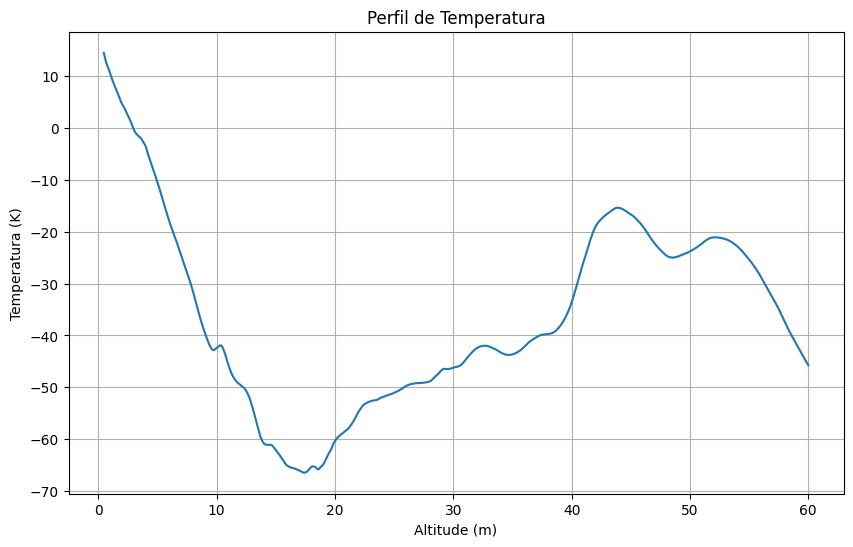

In [ ]:
dataset = nc.Dataset("/content/undata/wetPf2_C2E1.2023.182.00.01.R17_0001.0001_nc")
import matplotlib.pyplot as plt
# Extrair a temperatura e a altitude
temperature = dataset.variables['Temp'][:]
altitude = dataset.variables['MSL_alt'][:]

# Plotar
plt.figure(figsize=(10,6))
plt.plot( altitude,temperature)
plt.ylabel('Temperatura (K)')
plt.xlabel('Altitude (m)')
plt.title('Perfil de Temperatura')
plt.grid(True)
plt.show()

# Fechar o arquivo
dataset.close()

In [ ]:
!apt-get install -qq libgdal-dev libproj-dev
!pip install cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.0/56.0 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 96.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 115.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 78.3 MB/s eta 0:00:00


In [ ]:
import os
import netCDF4
import shutil

# Caminho para a pasta de origem
source_folder = "/content/undata"

# Caminho para a pasta de destino
dest_folder = "/content/south_america_data"

# Verificando se a pasta de destino existe, se não, criá-la
if not os.path.exists(dest_folder):
    os.makedirs(dest_folder)

# Limites de latitude e longitude para a América do Sul
lat_min = -60
lat_max = 15
lon_min = -90
lon_max = -30

# Iterar por todos os arquivos na pasta de origem
for filename in os.listdir(source_folder):
    file_path = os.path.join(source_folder, filename)

    # Tentar abrir o arquivo como um netCDF
    try:
        dataset = netCDF4.Dataset(file_path, mode='r')
    except:
        print(f"Erro ao abrir o arquivo: {filename}")
        continue

    # Verificar se o arquivo é inválido
    if hasattr(dataset, 'bad') and dataset.bad == 1:
        continue

    # Verificar a existência das chaves 'lat' e 'lon'
    if 'lat' in dataset.variables and 'lon' in dataset.variables:
        lat = dataset.variables['lat'][0]
        lon = dataset.variables['lon'][0]

        # Verificar se as coordenadas estão dentro dos limites da América do Sul
        if lat_min <= lat <= lat_max and lon_min <= lon <= lon_max:
            shutil.copy(file_path, dest_folder)

    dataset.close()

print("Arquivos copiados com sucesso!")


Arquivos copiados com sucesso!


/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


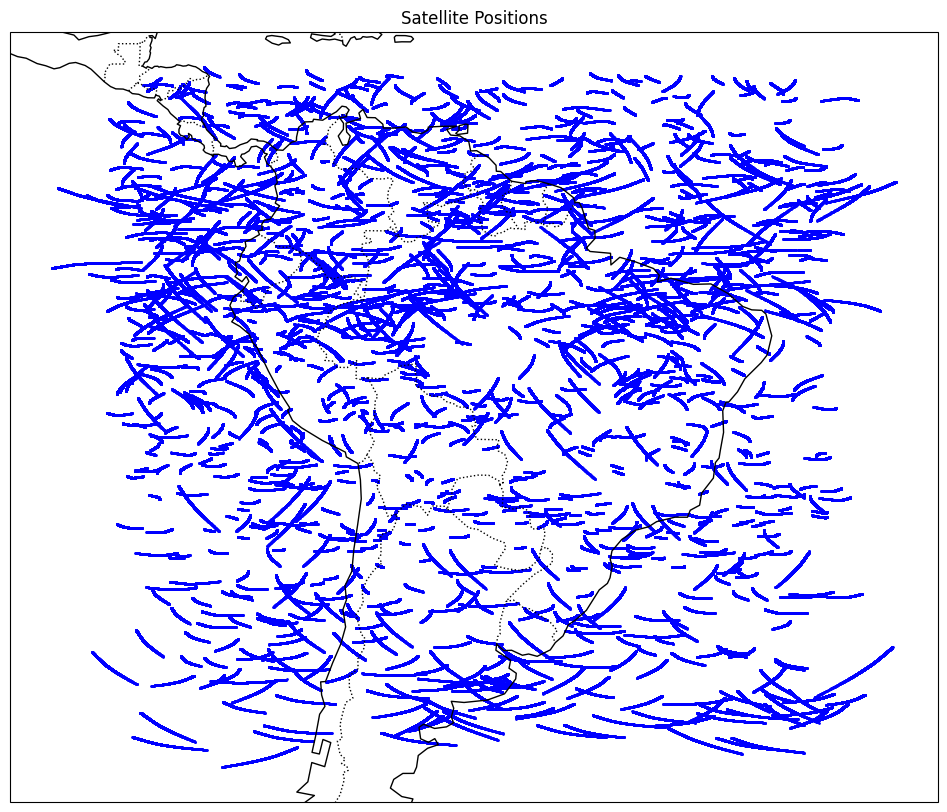

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

lats = []
lons = []

# Loop para ler todos os arquivos na pasta
data_path = "/content/south_america_data"
for file in os.listdir(data_path):
    if file.endswith(".0001_nc"):

        # Abrir o arquivo NetCDF
        dataset = nc.Dataset(os.path.join(data_path, file))

        # Tentando obter a latitude e longitude novamente, verificando se existem
        if 'lat' in dataset.variables:
            lat_values = dataset.variables['lat'][:]
            # Pegando o primeiro valor
            lats.extend(lat_values)

        if 'lon' in dataset.variables:
            lon_values = dataset.variables['lon'][:]
            # Pegando o primeiro valor
            lons.extend(lon_values)

        dataset.close()


# Criar uma figura e um mapa usando cartopy
fig, ax = plt.subplots(figsize=(15,10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

subset_lats = np.array(lats)
subset_lons = np.array(lons)

ax.scatter(subset_lons, subset_lats, s=1, color="blue", transform=ccrs.PlateCarree())
ax.set_title('Satellite Positions')
plt.show()

In [ ]:
import os
from netCDF4 import Dataset

# Carregar arquivos
path = "/content/south_america_data"
files = [f for f in os.listdir(path) if f.endswith('.0001_nc')]

data = []

for file in sorted(files):
    # Extrair hora do nome do arquivo
    hour, minute = file.split('.')[3:5]
    time = (int(hour) * 60) + int(minute)  # convertendo para minutos desde meia-noite

    # Carregar os dados NetCDF
    with Dataset(os.path.join(path, file), 'r') as nc_file:
        data_dict = {
            'MSL_alt': nc_file['MSL_alt'][:],
            'lat': nc_file['lat'][:],
            'lon': nc_file['lon'][:],
            'Temp': nc_file['Temp'][:],
            'Pres': nc_file['Pres'][:],
            'Vp': nc_file['Vp'][:],
            'ref': nc_file['ref'][:],
        }

    # Combina a hora com os dados
    data.append((time, data_dict))

#Organizar os dados em ordem temporal
#data.sort(key=lambda x: x[0])

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Convertendo os dados em um DataFrame
df_list = []
for t, d in data:
    d['time'] = t  # Adicionando a coluna de tempo
    df_list.append(pd.DataFrame(d))


# Concatenando todos os DataFrames
df = pd.concat(df_list, axis=0)
# Cria o scaler
scaler = MinMaxScaler()
# Remova as linhas com valores ausentes (NaN)
df.dropna(inplace=True)


# Aplica o scaler para normalizar todas as colunas
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Visualizando as primeiras linhas da tabela
print(df)
print(df_normalized)

       MSL_alt        lat        lon       Temp         Pres         Vp  \
0     0.000000   0.934638 -87.359352  26.485552  1010.233643  27.153879   
1     0.050000   0.934638 -87.359352  26.002384  1004.558838  26.444622   
2     0.100000   0.934991 -87.346924  25.519953   998.906616  26.166168   
3     0.150000   0.935380 -87.333183  25.036728   993.277344  25.962864   
4     0.200000   0.935816 -87.317810  24.567949   987.670227  25.762154   
..         ...        ...        ...        ...          ...        ...   
772  59.599998  10.377214 -33.447430 -38.450325     0.217333   0.000001   
773  59.700001  10.378701 -33.448597 -38.736076     0.214255   0.000001   
774  59.799999  10.380188 -33.449768 -39.006313     0.211216   0.000001   
775  59.900002  10.381675 -33.450935 -39.276550     0.208220   0.000001   
776  60.000000  10.383162 -33.452103 -39.546059     0.205267   0.000001   

            ref  time  
0    374.443298    28  
1    370.802338    28  
2    368.946716    28  
3  

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Definir as faixas de altitude
lower=2
upper=5

# Filtrar os dados para a faixa de altitude atual
df_filtered = df[(df['MSL_alt'] >= lower) & (df['MSL_alt'] < upper)]
dftest=df_filtered

# Verificar se df_filtered contém algum dado
if not df_filtered.empty:
  # Tratando outliers
  Q1 = df_filtered['Temp'].quantile(0.25)
  Q3 = df_filtered['Temp'].quantile(0.75)
  IQR = Q3 - Q1
  df_filtered = df_filtered[~((df_filtered['Temp'] < (Q1 - 1.5 * IQR)) | (df_filtered['Temp'] > (Q3 + 1.5 * IQR)))]

  # Normalizando os dados
  scaler = StandardScaler()
  df_filtered_scaled = scaler.fit_transform(df_filtered[['Temp','Pres', 'Vp']])

  # Criando o modelo KMeans com 4 clusters
  kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0)

  # Ajustando o modelo aos dados
  kmeans.fit(df_filtered_scaled)

  # Prever os clusters
  clusters = kmeans.predict(df_filtered_scaled)

  # Adicionar os rótulos dos clusters ao DataFrame original
  df_filtered['Cluster'] = clusters

<ipython-input-8-e80effacc8ac>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Cluster'] = clusters


In [ ]:
import pandas as pd
import altair as alt

# Dados do seu DataFrame (substitua pelos seus dados reais)
data = pd.DataFrame({'Temp': dftest['Temp']})
# Criando DataFrames
data_filtered = pd.DataFrame({'Temp': df_filtered['Temp']})

# Define o limite máximo de linhas para o Altair
alt.data_transformers.enable('default', max_rows=None)

# Criando os gráficos
chart1 = alt.Chart(data).mark_boxplot().encode(
    y=alt.Y('Temp:Q'),
    tooltip=['Temp:Q']
).properties(
    title='Antes da remoção de outliers'
).interactive()

chart2 = alt.Chart(data_filtered).mark_boxplot().encode(
    y=alt.Y('Temp:Q'),
    tooltip=['Temp:Q']
).properties(
    title='Depois da remoção de outliers'
).interactive()

# Combinando os gráficos em subplots
fig = chart1 | chart2
fig = fig.properties(
    title='Boxplot da variável Temp'
)

# Exibindo o gráfico
fig

alt.HConcatChart(...)

In [ ]:
print (df_filtered)

    MSL_alt       lat        lon       Temp        Pres         Vp  \
40     2.00  4.397672 -89.115822  14.341370  805.057800  14.348753   
41     2.05  4.404375 -89.105331  14.103327  800.334167  14.065928   
42     2.10  4.410806 -89.095261  13.857440  795.634094  13.786343   
43     2.15  4.416892 -89.085739  13.607752  790.956848  13.521056   
44     2.20  4.422789 -89.076508  13.357119  786.302979  13.277622   
..      ...       ...        ...        ...         ...        ...   
59     4.75  9.390900 -32.809719  -0.213421  577.186523   4.270766   
60     4.80  9.394504 -32.817379  -0.550374  573.607910   4.137028   
61     4.85  9.397855 -32.824482  -0.832327  570.046997   3.987125   
62     4.90  9.400872 -32.830860  -1.052084  566.504639   3.770120   
63     4.95  9.403553 -32.836517  -1.222517  562.981384   3.474409   

           ref  time  Cluster  
40  282.057129   156        4  
41  279.790009   156        4  
42  277.547455   156        4  
43  275.374451   156        4  

In [ ]:
df_filtered.columns

Index(['MSL_alt', 'lat', 'lon', 'gph', 'Temp', 'Pres', 'Vp', 'sph', 'rh',
       'ref', 'temp_dry', 'pres_dry', 'time'],
      dtype='object')

/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


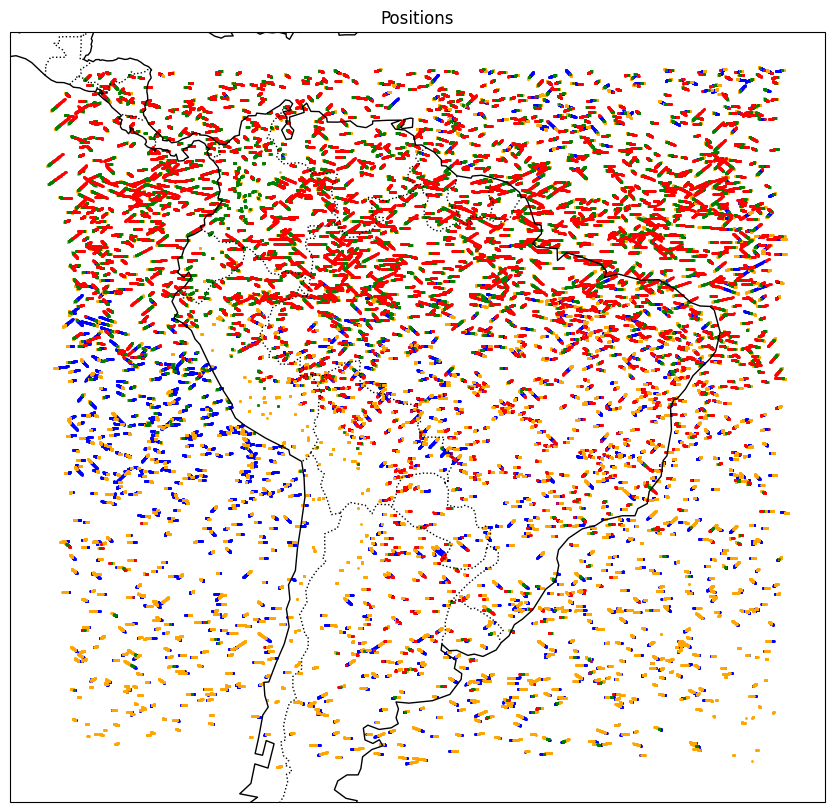

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

def plot_positions(df_filtered):
    fig, ax = plt.subplots(figsize=(15,10), subplot_kw={'projection': ccrs.PlateCarree()})
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    # cor
    colors = ['blue', 'orange', 'green',  'red']

    # Separando pelos clusters
    for gravity_level in range(4):

        subset_df = df_filtered[df_filtered['Cluster'] == gravity_level]

        # carrega as latitues e longitudes da base
        lats = subset_df['lat'].values
        lons = subset_df['lon'].values

        # Desenha no plano com cor referente para cada nivel
        ax.scatter(lons, lats, s=1, color=colors[gravity_level]) # , transform=ccrs.PlateCarree())

    ax.set_title('Positions')
    plt.show()


plot_positions(df_filtered)


ANOVA: F-statistic = 114918.38, p-value = 0.0000
Index(['MSL_alt', 'lat', 'lon', 'Temp', 'Pres', 'Vp', 'ref', 'time',
       'Cluster'],
      dtype='object')

ANOVA para Pres: F-statistic = 153778.10, p-value = 0.0000

ANOVA para Vp: F-statistic = 238186.74, p-value = 0.0000


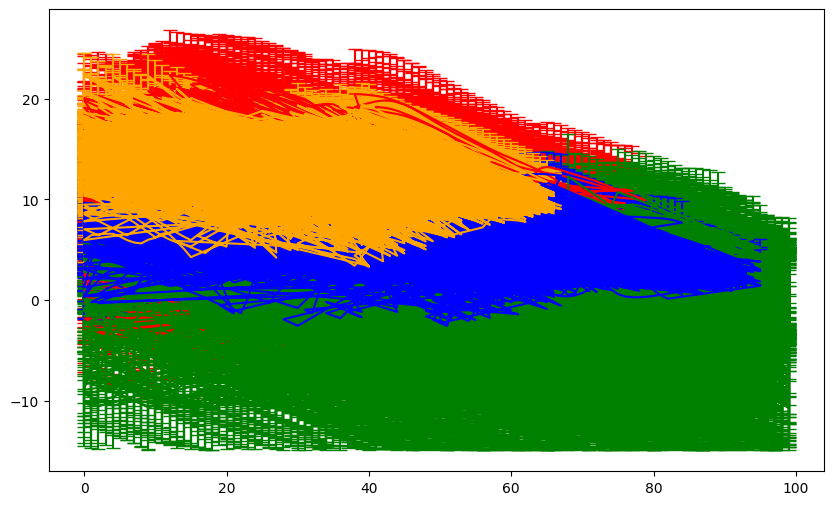

In [ ]:
import pandas as pd
import altair as alt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.stats import f_oneway
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns



#  ANOVA
grouped_data = [df_filtered['Temp'][df_filtered['Cluster'] == i] for i in range(4)] # 5 é o número de clusters
f_statistic, p_value = f_oneway(*grouped_data)
print(f'ANOVA: F-statistic = {f_statistic:.2f}, p-value = {p_value:.4f}')


#  Visualização dos Resultados - Perfis Médios de Temperatura
cluster_means = df_filtered.groupby('Cluster')['Temp'].mean()
cluster_stds = df_filtered.groupby('Cluster')['Temp'].std()

plt.figure(figsize=(10, 6))

cores = ['red', 'orange', 'blue', 'green']  # Lista de cores para os clusters

for i in range(4):
    cluster_data = df_filtered[df_filtered['Cluster'] == i]['Temp']
    plt.errorbar(x=cluster_data.index,
                 y=cluster_data,
                 yerr=cluster_data.std(),
                 label=f'Cluster {i}',
                 capsize=5,
                 color=cores[i])  # Usa a cor correspondente da lista

# 5. Análise da Influência de Outras Variáveis
print(df_filtered.columns)


other_variables = ['Pres', 'Vp']
for var in other_variables:
    grouped_data = [df_filtered[var][df_filtered['Cluster'] == i] for i in range(4)]
    f_statistic, p_value = f_oneway(*grouped_data)
    print(f'\nANOVA para {var}: F-statistic = {f_statistic:.2f}, p-value = {p_value:.4f}')

In [ ]:
df_filtered.to_csv('Dados.csv')

KeyboardInterrupt: 

In [ ]:
# Para salvar o DataFrame em um arquivo CSV chamado 'nome_do_arquivo.csv'
df.to_csv('excel.csv', index=True)

In [ ]:
print(cluster_stats)

NameError: name 'cluster_stats' is not defined

<ipython-input-9-2a7621bf4a12>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.fillna(df_filtered.mean(), inplace=True)


Índice de Davies-Bouldin (DBI): 0.966
Índice de Silhueta: 0.345
         MSL_alt                                                        lat  \
           count      mean       std   min   25%   50%   75%   max    count   
Cluster                                                                       
0        45261.0  2.913485  0.488921  2.00  2.50  2.95  3.30  4.75  45261.0   
1        65918.0  4.257160  0.593973  2.00  3.95  4.40  4.70  4.95  65918.0   
2        42156.0  3.851930  0.399340  2.35  3.55  3.85  4.15  4.90  42156.0   
3        43794.0  2.539587  0.364581  2.00  2.20  2.50  2.85  3.85  43794.0   

                    ...         ref                 time              \
              mean  ...         75%         max    count        mean   
Cluster             ...                                                
0       -14.562402  ...  222.291016  261.299011  45261.0  699.697024   
1       -14.673927  ...  190.090813  251.154800  65918.0  704.111821   
2         1.811170  ..

<ipython-input-9-2a7621bf4a12>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Cluster'] = labels
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


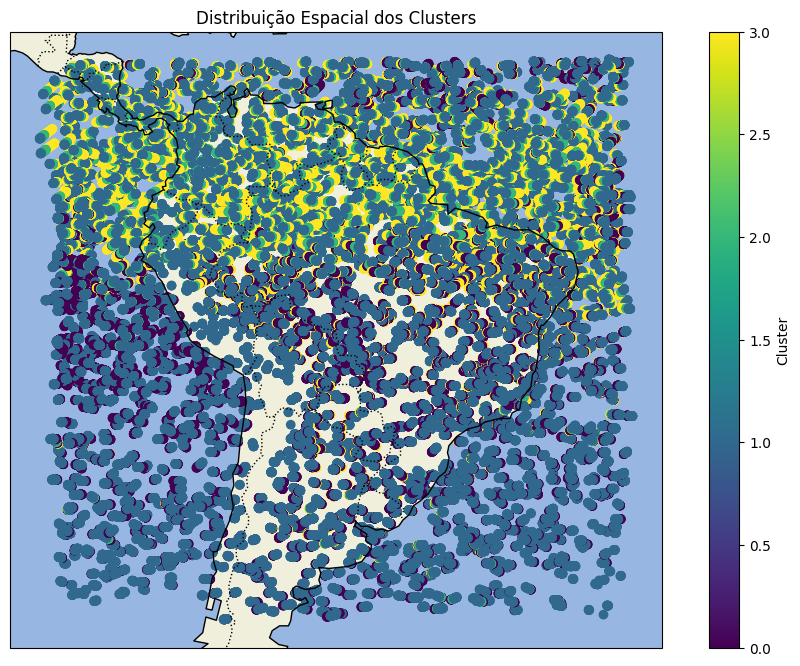

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt
import altair as alt

# 1. Carregar e preparar os dados
df_filtered.fillna(df_filtered.mean(), inplace=True)
X = df_filtered[['Temp','Pres', 'Vp']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Determinar o número ideal de clusters (K) com o método do cotovelo
sse = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

# Visualização do método do cotovelo com Altair
elbow_data = pd.DataFrame({'K': k_range, 'SSE': sse})
elbow_chart = alt.Chart(elbow_data).mark_line(point=True).encode(
    x=alt.X('K:O', axis=alt.Axis(title='Número de Clusters (K)')),
    y=alt.Y('SSE:Q', axis=alt.Axis(title='SSE')),
    tooltip=['K', 'SSE']
).properties(title='Método do Cotovelo para Determinação do Número de Clusters').interactive()
elbow_chart.save('elbow_method_plot.json')

# 3. Executar o K-Means com o valor ideal de K
k_ideal = 4  # Substitua pelo valor encontrado no gráfico do cotovelo
kmeans = KMeans(n_clusters=k_ideal, n_init=10, random_state=0)
kmeans.fit(X_scaled)
labels = kmeans.labels_

# 4. Avaliar os clusters (DBI e Silhouette Score)
dbi = davies_bouldin_score(X_scaled, labels)
silhouette_avg = silhouette_score(X_scaled, labels)
print(f'Índice de Davies-Bouldin (DBI): {dbi:.3f}')
print(f'Índice de Silhueta: {silhouette_avg:.3f}')

# 5. Analisar os resultados
df_filtered['Cluster'] = labels
cluster_stats = df_filtered.groupby('Cluster').describe()
print(cluster_stats)

# 6. Visualizar a distribuição espacial dos clusters
import cartopy.crs as ccrs
import cartopy.feature as cfeature

plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')


sc = ax.scatter(df_filtered['lon'], df_filtered['lat'], c=labels, cmap='viridis', transform=ccrs.PlateCarree())
plt.colorbar(sc, label='Cluster')
plt.title('Distribuição Espacial dos Clusters')
plt.show()

In [ ]:
print(X_scaled)

[[ 1.6172425   1.7844851   2.5925705 ]
 [ 1.5822685   1.717948    2.5246077 ]
 [ 1.5488138   1.6517503   2.4648042 ]
 ...
 [-1.0994631  -1.4880104  -0.04528319]
 [-1.1409087  -1.5384096  -0.07085046]
 [-1.1841056  -1.588545   -0.10052363]]


In [ ]:
np.savetxt('X_scaled.csv', X_scaled, delimiter=',')

In [ ]:
print(silhouette_avg)

0.34521663


In [ ]:
print(cluster_stats.to_markdown(numalign='left', stralign='left'))

| Cluster   | ('MSL_alt', 'count')   | ('MSL_alt', 'mean')   | ('MSL_alt', 'std')   | ('MSL_alt', 'min')   | ('MSL_alt', '25%')   | ('MSL_alt', '50%')   | ('MSL_alt', '75%')   | ('MSL_alt', 'max')   | ('lat', 'count')   | ('lat', 'mean')   | ('lat', 'std')   | ('lat', 'min')   | ('lat', '25%')   | ('lat', '50%')   | ('lat', '75%')   | ('lat', 'max')   | ('lon', 'count')   | ('lon', 'mean')   | ('lon', 'std')   | ('lon', 'min')   | ('lon', '25%')   | ('lon', '50%')   | ('lon', '75%')   | ('lon', 'max')   | ('Temp', 'count')   | ('Temp', 'mean')   | ('Temp', 'std')   | ('Temp', 'min')   | ('Temp', '25%')   | ('Temp', '50%')   | ('Temp', '75%')   | ('Temp', 'max')   | ('Pres', 'count')   | ('Pres', 'mean')   | ('Pres', 'std')   | ('Pres', 'min')   | ('Pres', '25%')   | ('Pres', '50%')   | ('Pres', '75%')   | ('Pres', 'max')   | ('Vp', 'count')   | ('Vp', 'mean')   | ('Vp', 'std')   | ('Vp', 'min')   | ('Vp', '25%')   | ('Vp', '50%')   | ('Vp', '75%')   | ('Vp', 'max')   | ('ref', 'count')

In [ ]:
df_filtered.fillna(df_filtered.mean())

,MSL_alt,lat,lon,Temp,Pres,Vp,ref,time,Cluster
40,2.00,4.397672,-89.115822,14.341370,805.057800,14.348753,282.057129,156,0
41,2.05,4.404375,-89.105331,14.103327,800.334167,14.065928,279.790009,156,0
42,2.10,4.410806,-89.095261,13.857440,795.634094,13.786343,277.547455,156,0
43,2.15,4.416892,-89.085739,13.607752,790.956848,13.521056,275.374451,156,0
44,2.20,4.422789,-89.076508,13.357119,786.302979,13.277622,273.302399,156,0
...,...,...,...,...,...,...,...,...,...
76,4.75,9.758934,-33.041866,-1.410329,576.965820,4.047615,185.208344,1365,1
77,4.80,9.762315,-33.048328,-1.832086,573.371948,4.101907,184.775284,1365,1
78,4.85,9.765328,-33.054081,-2.194368,569.795227,4.120399,184.119766,1365,1
79,4.90,9.768314,-33.059765,-2.506059,566.236572,4.074509,183.101913,1365,1


In [ ]:
df_filtered.to_csv('Dados.csv')